<a href="https://colab.research.google.com/github/AngeMervaneJdev/ML_AI_1/blob/main/NetWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


##Data acquisition

In [29]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [30]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

###Visualization of image data

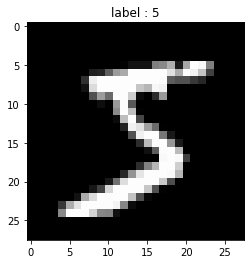

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


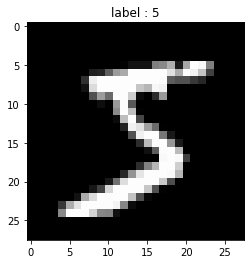

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

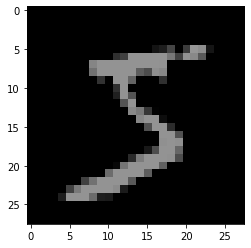

In [32]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # Convert to float type
image -= 105.35 # Intentionally try to create a negative decimal value
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # Check the value
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

###Processing

In [33]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [34]:

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


## Probleme 1 Creating a code to determine the initial weight value

In [36]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 # Standard deviation of Gaussian distribution
W1 = sigma * np.random.randn(n_features, n_nodes1)
print(W1)

[[ 0.0031906   0.00205194 -0.01425735 ... -0.00453561 -0.00462945
  -0.01128179]
 [ 0.00092723 -0.00617455 -0.00245587 ...  0.00289917  0.00871402
  -0.01259372]
 [ 0.00707282  0.01360386 -0.00912032 ... -0.01340911 -0.01123785
  -0.00042094]
 ...
 [ 0.00418351  0.01198815  0.01948874 ...  0.00653855  0.00804865
   0.01138037]
 [ 0.0078761   0.01704447  0.00756441 ...  0.01116652  0.00810329
  -0.00311511]
 [-0.0005253  -0.01089276 -0.0119847  ... -0.00438888  0.00679327
  -0.00607459]]


##[Problem 2] Implementation of forward propagation

In [37]:
n_features = 784
n_output=10
sigma = 0.01

n_nodes1 = 400
W1 = sigma * np.random.randn(n_features, n_nodes1)

n_nodes2 = 200
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)

W3=sigma*np.random.randn(n_nodes2,n_output)

In [38]:
def forward_propagation(X):
  B1=0
  B2=0
  B3=0
  new_inputs=[]
  A1=X.dot(W1)+B1
  z1 = sigmoid(A1)

  A2=z1.dot(W2)+B2
  z2=sigmoid(A2)

  A3=z2.dot(W3)+B3
  z3=softmax(A3)

   
  return z3,z2,z1,A1,A2,A3

In [39]:
def sigmoid(A):
  return 1/(1+np.exp(-A))

In [40]:
def tanh(A):
  return (np.exp(A)-np.exp(-A)/(np.exp(A)+np.exp(-A)))
  

In [41]:
def softmax(A3_k):
  return np.exp(A3_k)/np.sum(np.exp(A3_k))


In [42]:
z3,z2,z1,A1,A2,A3=forward_propagation(X_train)
z3

array([[2.00663686e-06, 2.15900616e-06, 2.22140306e-06, ...,
        2.08375423e-06, 1.97317802e-06, 2.22109995e-06],
       [2.00696786e-06, 2.15850052e-06, 2.22168480e-06, ...,
        2.08406961e-06, 1.97293075e-06, 2.22108683e-06],
       [2.00701109e-06, 2.15811989e-06, 2.22164026e-06, ...,
        2.08393031e-06, 1.97303759e-06, 2.22123507e-06],
       ...,
       [2.00692202e-06, 2.15836371e-06, 2.22187434e-06, ...,
        2.08317059e-06, 1.97285170e-06, 2.22170353e-06],
       [2.00736905e-06, 2.15837641e-06, 2.22120923e-06, ...,
        2.08366660e-06, 1.97262841e-06, 2.22101579e-06],
       [2.00716437e-06, 2.15801928e-06, 2.22155410e-06, ...,
        2.08398425e-06, 1.97276875e-06, 2.22089264e-06]])

In [43]:
z3.shape

(48000, 10)

#[Problem 3] Implementation of cross entropy error

In [44]:
def cross_entropy_error(nb,y,z3):
  sum1=np.sum(y.dot((np.log(z3)+1e-7)))
  return (-1/nb)*(np.sum(sum1))

In [45]:
cross_entropy_error(len(X_train),y_train,z3)

583.5087650850012

#[Problem 4] Implementation of backpropagation

In [145]:
def backpropagation(X,nb,z3,y):
  ######################

  dLA3=(1/nb)*(z3-y[:,None])
  dLB3=np.sum(dLA3)
  dLW3=z2.T.dot(dLA3)
  dLz2=dLA3.dot(W3.T)

  ######################

  dLA2=np.multiply(dLz2,(1-tanh(A2)**2))
  dLB2=np.sum(dLA2)
  dLW2=z1.T.dot(dLA2)
  dLz1=dLA2.dot(W2.T)

  ######################

  dLA1=np.multiply(dLz1,(1-tanh(A1)**2))
  dLB2=np.sum(dLA1)
  dLW1=X.T.dot(dLA1)

  return dLW1




In [47]:
backpropagation(X_train,len(X_train),z3,y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#[Problème 5] Estimation

In [48]:
np.argmax(z3,axis=0)

array([32146, 10431, 27054, 42874,  6925,  1908, 35647, 15358,  1799,
       13410])

#[Problème 6] Apprentissage et estimation

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)
X_train /= 255
X_test /= 255

In [12]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])

print(y_train.shape)
print(y_train_one_hot.shape)
print(y_train_one_hot.dtype)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(60000,)
(60000, 10)
float64
(48000, 784) (48000, 10)
(12000, 784) (12000, 10)


In [101]:
z3,z2,z1,A1,A2,A3=forward_propagation(X_train)
y_pred=np.argmax(z3,axis=0)
y_pred

array([45932, 17202, 37688, 18812,   808, 15798,  5895, 46229, 47350,
       10247])

In [104]:
cross_entropy_error(len(X_train),y_train,z3)

581.4046371252256

In [8]:
class GetMiniBatch:
    """
Iterator to get a mini-batch

    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
      Training data
    y : The following form of ndarray, shape (n_samples, 1)
      Correct answer value
    batch_size : int
      Batch size
    seed : int
      NumPy random number seed
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [9]:
class ScratchSimpleNeuralNetrowkClassifier():


    def __init__(self, activation, n_nodes1, n_nodes2, n_output):
        self.activation = activation          
        self.n_nodes1 = n_nodes1      
        self.n_nodes2 = n_nodes2      
        self.n_output = n_output              
        
    def __initialize_weights(self):
        sigma = 0.01 
        
        self.W1 = sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.B1 = sigma * np.random.randn(self.n_nodes1)
        
        self.W2 = sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.B2 = sigma * np.random.randn(self.n_nodes2)
        
        self.W3 = sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.B3 = sigma * np.random.randn(self.n_output)
    
    def __forward_propagation(self, X):

        ######
        self.A1 = np.dot(X, self.W1) + self.B1        
        self.Z1 = self.__activation_function(self.A1)
        
        ######
        self.A2 = np.dot(self.Z1, self.W2) + self.B2        
        self.Z2 = self.__activation_function(self.A2)           
        
        ######
        A3 = np.dot(self.Z2, self.W3) + self.B3

        return self.__softmax_function(A3)
    
    def __activation_function(self, A):

        if self.activation == 'sigmoid':           
            return 1 / (1 + np.exp(-A))
        elif self.activation == 'tanh':            
            return np.tanh(A)   
        else:
            raise NameError("name \"" + str(self.activation) + "\" is not defined. set either \"sigmoid\" or \"tanh\" .") 

    def __softmax_function(self, A):       
        return np.exp(A) / np.sum(np.exp(A), axis=1, keepdims=True)
    

    def __cross_entropy_error(self,y,z3):
      sum1=np.sum(y.dot((np.log(z3.T)+1e-7)))
      nb=len(y)
      return (-1/nb)*(np.sum(sum1))
    # def __cross_entropy_error(self, y, z):
    #     """
    #     交差エントロピー誤差で目的関数を計算する関数
    #     """
    #     batch_size = y.shape[0]

    #     return -np.sum(y.T.dot(np.log(z))) / batch_size

    def __backpropagation(self):
        ############
        partial_A3 = self.Z3 - self.y_

        partial_B3 = np.sum(partial_A3, axis=0)     
        partial_W3 = np.dot(self.Z2.T,  partial_A3)
        partial_Z2 = np.dot(partial_A3, self.W3.T)         

        self.W3, self.B3 = self.__stochastic_gradient_descent(self.W3, partial_W3, self.B3, partial_B3)       

        ##########
        partial_A2 = self.__derivative_function(self.A2, partial_Z2)
        partial_B2 = np.sum(partial_A2, axis=0)
        partial_W2 = np.dot(self.Z1.T,  partial_A2)    
        partial_Z1 = np.dot(partial_A2, self.W2.T)         

        self.W2, self.B2 = self.__stochastic_gradient_descent(self.W2, partial_W2, self.B2, partial_B2)

        ############
        partial_A1 = self.__derivative_function(self.A1, partial_Z1)

        partial_B1 = np.sum(partial_A1, axis=0)
        partial_W1 = np.dot(self.X_.T,  partial_A1)
        
        self.W1, self.B1 = self.__stochastic_gradient_descent(self.W1, partial_W1, self.B1, partial_B1)
 
    def __derivative_function(self, A, Z):     
        if self.activation == 'sigmoid':
            return Z * np.multiply((1.0 - self.__activation_function(A)), self.__activation_function(A))
        elif self.activation == 'tanh':                
            return Z * (1.0 - (np.tanh(A) ** 2))
            
    def __stochastic_gradient_descent(self, W, partial_W, B, partial_B):      
        lr = 0.001 
        W_prime = W - lr * partial_W
        B_prime = B - lr * partial_B
        return W_prime, B_prime
  
    def fit(self, X, y, X_val=None, y_val=None, epochs=10, batch_size=20):
        """
        Learn a neural network classifier.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """

        self.epochs = epochs                               
        self.batch_size = batch_size               
        self.n_features = X.shape[1]              
        self.val_is_true = False                        
        self.loss = np.zeros(self.epochs)       
        self.loss_val = np.zeros(self.epochs)
        
        self.__initialize_weights() 
        
        for epoch in range(self.epochs):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)
            for mini_X_train,  mini_y_train in get_mini_batch:
                self.X_ = mini_X_train
                self.y_ = mini_y_train


                self.Z3 = self.__forward_propagation(self.X_)

                self.loss[epoch] = self.__cross_entropy_error(self.y_, self.Z3)

                self.__backpropagation()

            if not(X_val is None) and not(y_val is None):
                self.val_is_true = True
                
                self.y_val_pred = self.__forward_propagation(X_val)
             
                self.loss_val[epoch] = self.__cross_entropy_error(y_val, self.y_val_pred)      

    def predict(self, X):        
        y_pred = self.__forward_propagation(X)    

        return np.argmax(y_pred, axis=1)
    
    def plot_learning_curve(self):
        """
        学習曲線をプロットする。    
        """
        plt.plot(range(1, self.epochs + 1), self.loss, color="r", marker="o", label="train loss")
        if self.val_is_true:
            plt.plot(range(1, self.epochs + 1), self.loss_val, color="g", marker="o", label="val loss")
            
        plt.title("Learning Curve")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.grid()
        plt.legend(loc="best")
        plt.show()

In [14]:
model = ScratchSimpleNeuralNetrowkClassifier(activation="tanh", n_nodes1=400, n_nodes2=200, n_output=10)
model.fit(X_train, y_train, X_val, y_val, epochs = 20, batch_size = 20)
y_pred = model.predict(X_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [19]:
y_pred = model.predict(X_val)
print(len(y_pred))
# print(accuracy_score(y_val, y_pred))

12000


In [21]:
y_val = np.argmax(y_val, axis=1)

In [22]:
print("accuracy : {}".format(accuracy_score(y_val, y_pred)))

accuracy : 0.97075


#【Problem 7】Learning curve plot

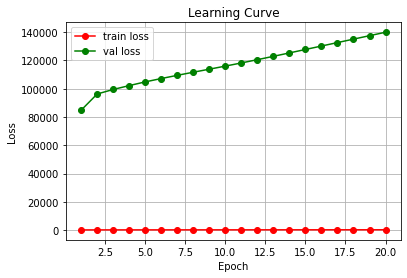

In [25]:
model.plot_learning_curve()

#[Problem 8] (Advance assignment) Confirmation of misclassification

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


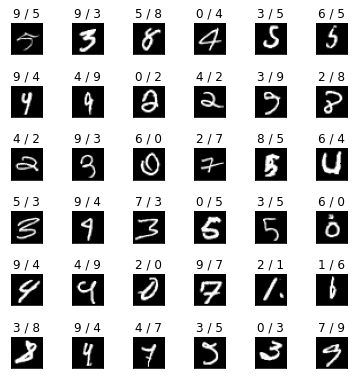

In [26]:
"""
Display word classification results side by side. The display above the image is "estimated result / correct answer".

Parameters:
----------
y_pred : Estimated ndarray (n_samples,)
y_val : Correct label of verification data (n_samples,)
X_val : Verification data features (n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt

num = 36 # How many to display

true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')